# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We will use Tensorflow 2 (TF 2) and the Keras API. If you need to install some packages, use `pip install ...`, e.g. `pip install sklearn` for SciKit Learn.

## Loading the packages

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [6]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

2022-04-02 13:51:47.805466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-02 13:51:47.805511: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


OK: TensorFlow >= 2.0.0.


## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

11501568/11490434 [==============================] - 1s 0us/step


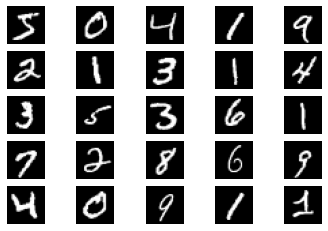

In [7]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

show_imgs(X_train)

In [8]:
X_train =  X_train.reshape(-1, 28*28) #                     change the shape towards (60000, 784)
X_test =   X_test.reshape(-1, 28*28)   # ...                     idem (10000, 784)
X_test =   X_test.astype('float32') #                 change the type towards float32
X_train =  X_train.astype('float32')#  idem
X_train /= 255.0                  #normalize the range to be between 0.0 and 1.0
X_test /=  255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [9]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes) #                modify targets to 1-hot using utils.to_categorical()
Y_test = keras.utils.to_categorical(y_test, n_classes)# ...                   idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [11]:
E = 10               # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

# ... define the model as a Sequential type
model = keras.models.Sequential()
# ... add a layer of type Dense with softmax activation
model.add(keras.layers.Dense(n_classes, activation="softmax", input_shape=(D,), name="dense_layer"))

# ... print model infomration with summary() method
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


2022-04-02 13:52:02.416870: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-02 13:52:02.416912: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-02 13:52:02.416934: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f05db13702d5): /proc/driver/nvidia/version does not exist
2022-04-02 13:52:02.418185: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [12]:
# ... compile the model with a crossentropy loss, rmsprop optimizer 
#      and defining metrics to be stored as history of the training
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])



In [13]:
# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=True, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.6027 - accuracy: 0.8529 - val_loss: 0.3400 - val_accuracy: 0.9076
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3301 - accuracy: 0.9089 - val_loss: 0.2968 - val_accuracy: 0.9163
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3015 - accuracy: 0.9154 - val_loss: 0.2869 - val_accuracy: 0.9198
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2881 - accuracy: 0.9197 - val_loss: 0.2801 - val_accuracy: 0.9217
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2801 - accuracy: 0.9217 - val_loss: 0.2741 - val_accuracy: 0.9239
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2748 - accuracy: 0.9236 - val_loss: 0.2736 - val_accuracy: 0.9256
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2707 - accuracy: 0.9251 - val_loss: 0.2717 - val_accuracy: 0.9249
Epoch 

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

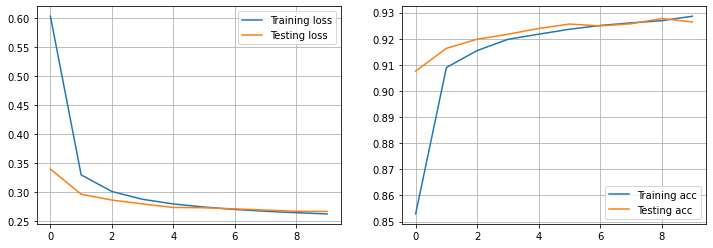

In [14]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [15]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.2672737240791321
Test accuracy: 0.9264000058174133


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [19]:
predict_x = model.predict(X_test, verbose=1)
classes_x=np.argmax(predict_x,axis=1)
tf.math.confusion_matrix(y_test, classes_x)

313/313 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   4,    6,  934,   15,   10,    3,   13,   11,   33,    3],
       [   4,    0,   21,  919,    0,   24,    2,   12,   20,    8],
       [   2,    1,    5,    1,  922,    0,    8,    4,    8,   31],
       [  10,    3,    4,   31,    8,  780,   15,    7,   28,    6],
       [  13,    3,    7,    1,    7,   12,  912,    2,    1,    0],
       [   1,    6,   23,    6,    8,    0,    0,  955,    3,   26],
       [   8,    9,    7,   24,   10,   34,    9,   14,  853,    6],
       [  11,    7,    1,   11,   29,    7,    0,   28,    5,  910]],
      dtype=int32)>

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(784, 10)
(10,)


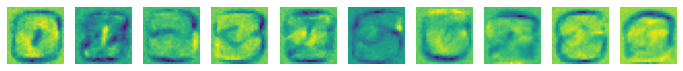

In [20]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                  # get the weights landing to neuron i
    im = im.reshape(28,28)        # reshape the vector of weights into 28x28 image
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)